<a href="https://colab.research.google.com/github/joshiakshada0404/CNN_Learning/blob/main/Dogs_Cats_Image_Classification(Without_agumentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install -U future

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1. os - to read files from the directory structure
2. numpy - for some matrix math outside tensorflow
3. matplotlib - 

In [2]:

from __future__ import absolute_import, division, print_function
import os
import matplotlib.pyplot as plt
import numpy as np


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

Data Loading


In [4]:
#reading image direclty from the Kaggle and using it to the colab file 

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=_URL,extract = True)


In [5]:
#list all the directories 

zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [6]:
#assigning variables with proper file path 

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  #dir with training cat pics
train_dogs_dir = os.path.join(train_dir,'dogs')   #dir with traing dogs pics
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Understanding our data

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


In [8]:
print("Total Training cat images : ", num_cats_tr)
print("Total Training dogs image : ", num_dogs_tr)

print("Total validation cat images : ", num_cats_val)
print("Total validation dogs images : ", num_dogs_val)

print("Total training images : ", total_train)
print("Total validation images : ", total_val)

Total Training cat images :  1000
Total Training dogs image :  1000
Total validation cat images :  500
Total validation dogs images :  500
Total training images :  2000
Total validation images :  1000


## Setting Model Parameters

In [9]:
BATCH_SIZE = 100   #Number of training examples to process before updating our model variables
IMG_SIZE = 150     # our training data consists of images with width of 150 px and height of 150px


## Data Agumentation


Data Prepration

1. read images from the disk.
2. Decode contents of these images and convert it into proper grid format as per their RGB content.
3. Convert them into floating point tensor
4. Rescale the tensors from value between 0 to 255 to values between 0 and 1, as NN prefer to deal with small input values.

all task done by tf.keras.preprocessing.image.ImageDataGenerator  / flow_from_directory

In [10]:
train_image_generator =  ImageDataGenerator(rescale = 1./255) 
validation_image_generator = ImageDataGenerator(rescale = 1./255)

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory = train_dir,
                                                           shuffle = True,
                                                           target_size =(IMG_SIZE,IMG_SIZE),
                                                           class_mode = 'binary')


validation_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory = validation_dir,
                                                           shuffle = False,
                                                           target_size =(IMG_SIZE,IMG_SIZE),
                                                           class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Visualising Training data


In [12]:
sample_training_images, _ = next(train_data_gen)


In [13]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

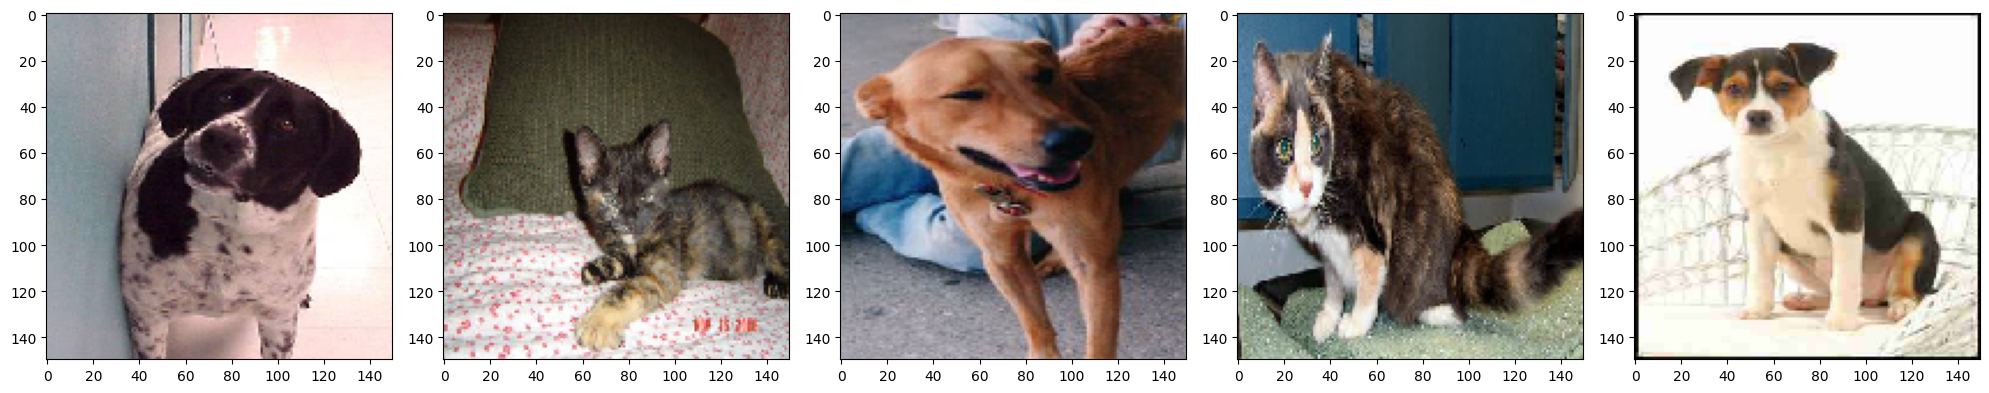

In [14]:
plotImages(sample_training_images[:5])

## Model Creation


In the given code, the first Conv2D layer has 32 filters, the second has 64, and the third has 128. This means that the first layer will learn 32 different patterns or features, the second layer will learn 64 different patterns or features, and so on.

In [15]:
#Define the model

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3,3), activation ='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
     
        tf.keras.layers.Conv2D(64, (3,3), activation ='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
       
        tf.keras.layers.Conv2D(128, (3,3), activation ='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
     
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
    ]
)

In [16]:
#compile the model

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [18]:
#taking time not running now will do it with GPU


#train the model

#since our data is coming from generator we will use fit)generator

EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = validation_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

In [19]:
#visualise the training and validation set accuracy


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

NameError: ignored